In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

def load_data(file_path):
    # Load dataset
    df = pd.read_csv(file_path)

    # Define the feature columns and target column
    feature_columns = [
        'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
        'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
        'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression',
        'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
        'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
        'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
        'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
        'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
    ]
    target_column = 'Diagnosis'

    # Prepare features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def tune_and_evaluate_classifiers(X_train, X_test, y_train, y_test):
    # Classifiers with hyperparameter tuning using GridSearchCV for some models
    classifiers = {
        'Logistic Regression': GridSearchCV(LogisticRegression(max_iter=1000), {'C': [0.01, 0.1, 1, 10]}, cv=5),
        'Random Forest': GridSearchCV(RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}, cv=5),
        'AdaBoost': GridSearchCV(AdaBoostClassifier(), {'n_estimators': [50, 100]}, cv=5),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'Naive Bayes': MultinomialNB(),
        'SVM': GridSearchCV(SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}, cv=5),
        'KNN': GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}, cv=5),
        'Decision Tree': GridSearchCV(DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}, cv=5),
        'Voting Classifier': VotingClassifier(estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
        ], voting='hard')
    }

    scores = {}
    conf_matrices = {}

    for name, clf in classifiers.items():
        # Cross-validation and parameter tuning
        clf.fit(X_train, y_train)
        best_params = clf.best_params_ if isinstance(clf, GridSearchCV) else None
        if best_params:
            print(f"{name} best parameters: {best_params}")

        # Train the model
        score = clf.score(X_test, y_test)
        scores[name] = score
        print(f"{name} test accuracy: {score}")

        # Predictions and evaluation metrics
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision_macro = precision_score(y_test, y_pred, average='macro')
        precision_micro = precision_score(y_test, y_pred, average='micro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        recall_micro = recall_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_micro = f1_score(y_test, y_pred, average='micro')

        print(f"{name} Evaluation Metrics:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision (Macro): {precision_macro:.4f}")
        print(f"  Precision (Micro): {precision_micro:.4f}")
        print(f"  Recall (Macro): {recall_macro:.4f}")
        print(f"  Recall (Micro): {recall_micro:.4f}")
        print(f"  F1-Score (Macro): {f1_macro:.4f}")
        print(f"  F1-Score (Micro): {f1_micro:.4f}")

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrices[name] = conf_matrix
        print(f"{name} Confusion Matrix:\n", conf_matrix)

        # Classification report
        print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

    return scores, conf_matrices

# Path to your dataset
dataset_path = '/content/alzheimers_disease_data.csv'  # Replace with your actual dataset file path

# Load data
X_train, X_test, y_train, y_test = load_data(dataset_path)

# Training models and evaluating performance
scores, conf_matrices = tune_and_evaluate_classifiers(X_train, X_test, y_train, y_test)

# Optionally, print the final scores
print("Final Scores:", scores)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression best parameters: {'C': 10}
Logistic Regression test accuracy: 0.8255813953488372
Logistic Regression Evaluation Metrics:
  Accuracy: 0.8256
  Precision (Macro): 0.8134
  Precision (Micro): 0.8256
  Recall (Macro): 0.8003
  Recall (Micro): 0.8256
  F1-Score (Macro): 0.8059
  F1-Score (Micro): 0.8256
Logistic Regression Confusion Matrix:
 [[246  31]
 [ 44 109]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430

Random Forest best parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest test accuracy: 0.9348837209302325
Random Forest Evaluation Metrics:
  Accuracy: 0.9349
  Precision (Macro): 0.9425
  Precision (Micro): 0.9349
  Recall (Macro): 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost test accuracy: 0.9488372093023256
XGBoost Evaluation Metrics:
  Accuracy: 0.9488
  Precision (Macro): 0.9511
  Precision (Micro): 0.9488
  Recall (Macro): 0.9369
  Recall (Micro): 0.9488
  F1-Score (Macro): 0.9433
  F1-Score (Micro): 0.9488
XGBoost Confusion Matrix:
 [[271   6]
 [ 16 137]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

Naive Bayes test accuracy: 0.6906976744186046
Naive Bayes Evaluation Metrics:
  Accuracy: 0.6907
  Precision (Macro): 0.6658
  Precision (Micro): 0.6907
  Recall (Macro): 0.6707
  Recall (Micro): 0.6907
  F1-Score (Macro): 0.6678
  F1-Score (Micro): 0.6907
Naive Bayes Confusion Matrix:
 [[205  72]
 [ 61  92]]
Naive Bayes Classification Repo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

Accuracy: 0.9581
Precision (Macro): 0.9584
Recall (Macro): 0.9500
F1-Score (Macro): 0.9539


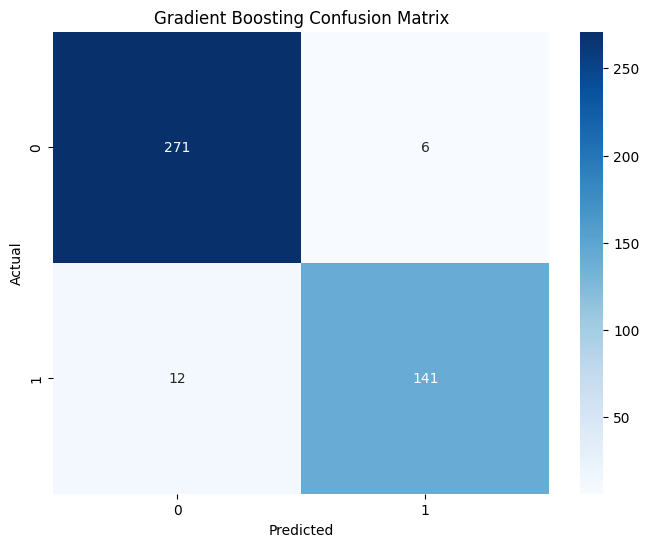

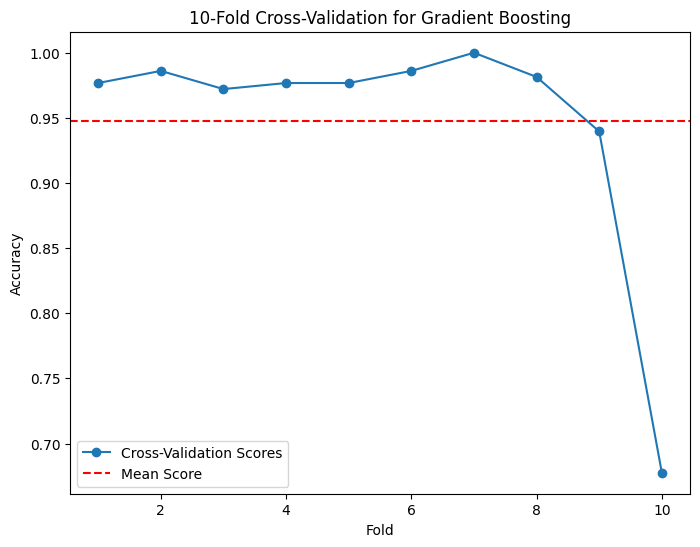

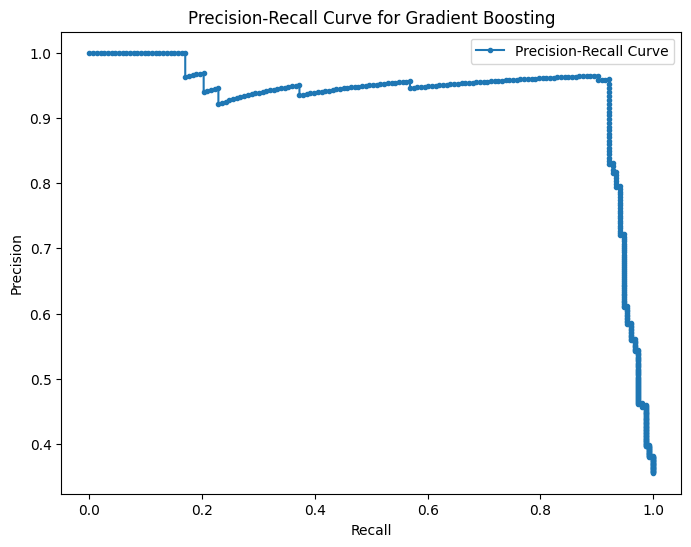

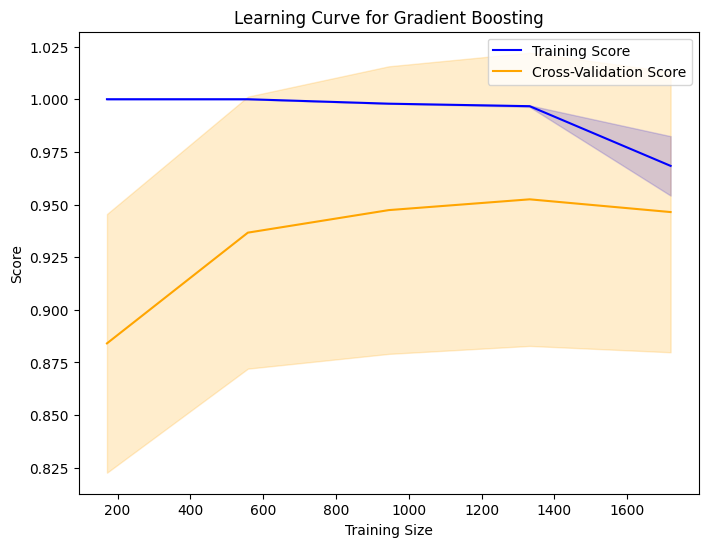

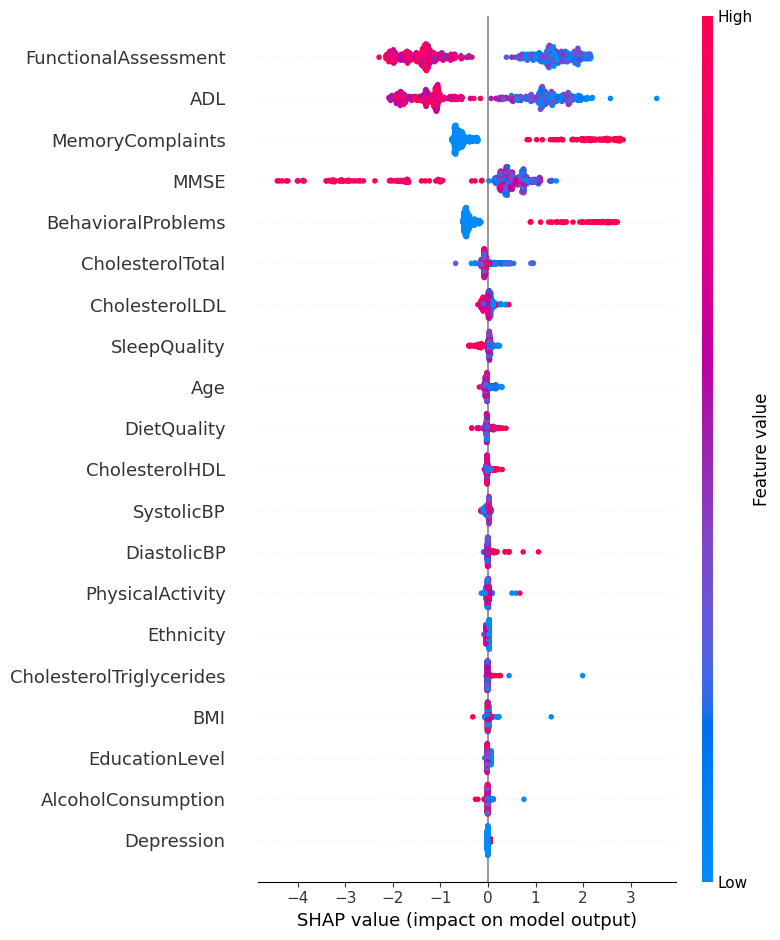

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import shap

def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_cross_validation(scores, title):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label='Cross-Validation Scores')
    plt.axhline(y=np.mean(scores), color='r', linestyle='--', label='Mean Score')
    plt.title(title)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_precision_recall_curve(y_test, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.title(title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

def plot_learning_curve(estimator, X, y, title):
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Load the data
dataset_path = '/content/alzheimers_disease_data.csv'  # Replace with your dataset path
df = pd.read_csv(dataset_path)

# Features and Target
feature_columns = [
    'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
    'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression',
    'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
    'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
]
target_column = 'Diagnosis'
X = df[feature_columns]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.decision_function(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, labels=np.unique(y), title='Gradient Boosting Confusion Matrix')

# 10-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=10)
plot_cross_validation(cv_scores, title='10-Fold Cross-Validation for Gradient Boosting')

# Precision-Recall Curve
plot_precision_recall_curve(y_test, y_scores, title='Precision-Recall Curve for Gradient Boosting')

# Learning Curve
plot_learning_curve(model, X, y, title='Learning Curve for Gradient Boosting')

# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


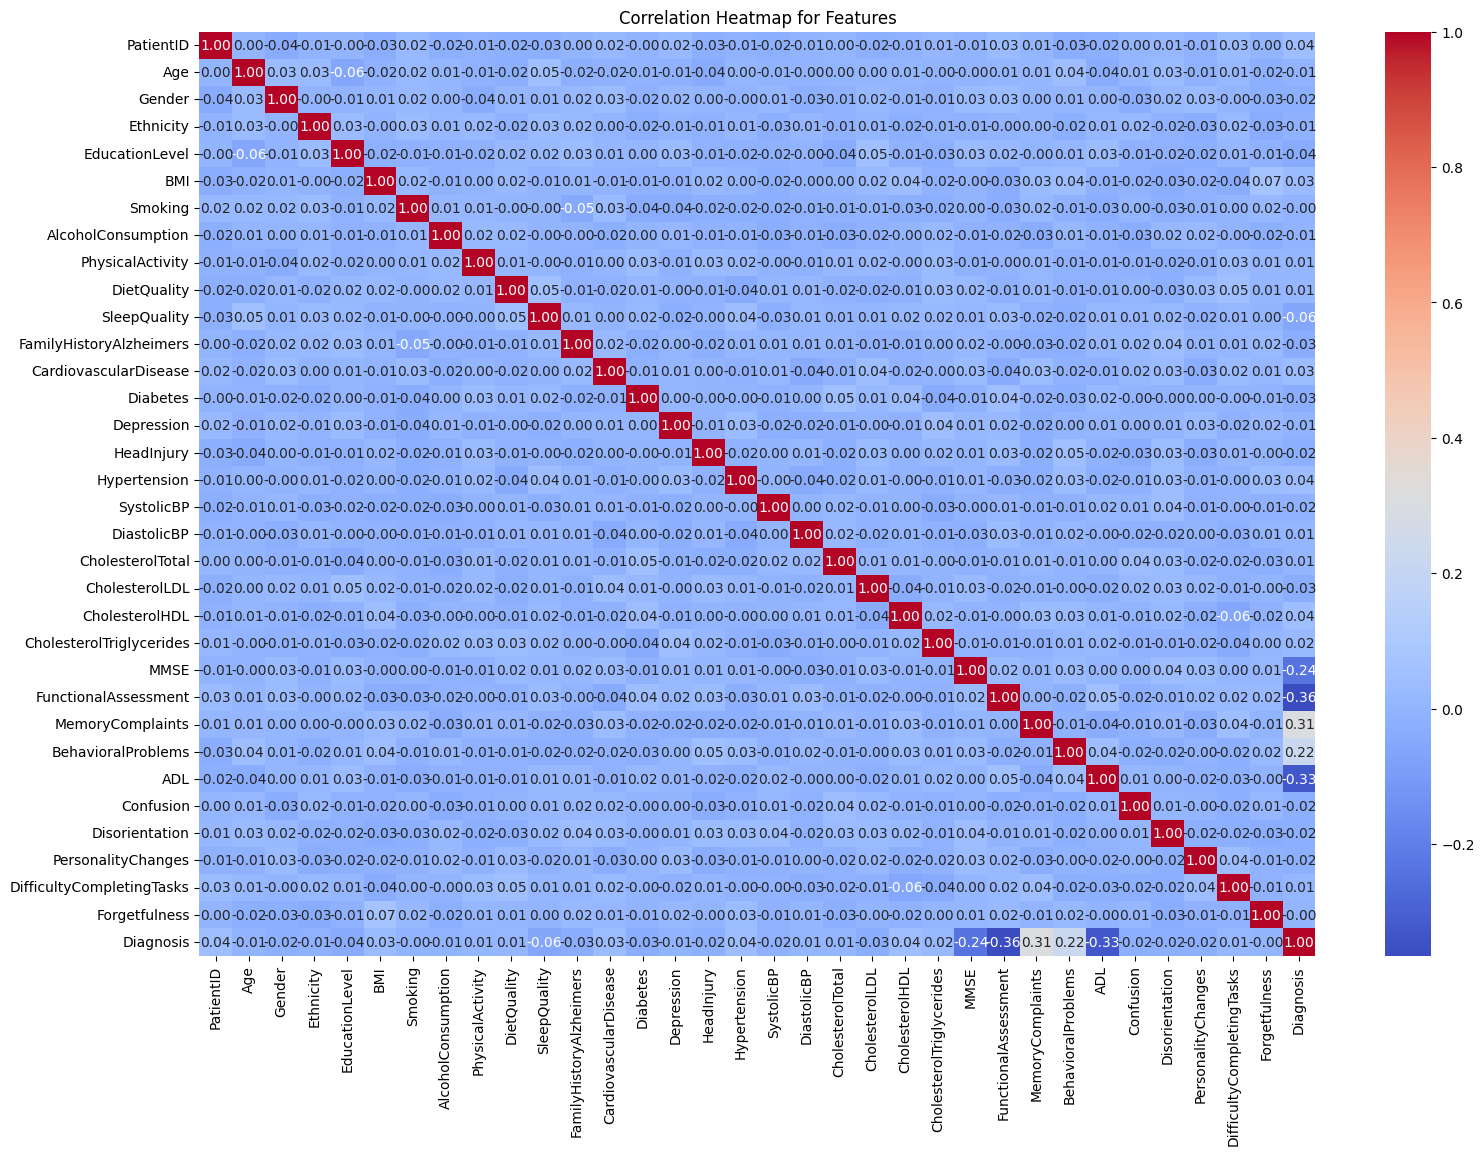

In [ ]:
def plot_correlation_heatmap(df, title):
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    plt.figure(figsize=(18, 12))
    correlation_matrix = numeric_df.corr()  # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()

# Call the function for your dataset
plot_correlation_heatmap(df, title='Correlation Heatmap for Features')


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   214

<ipython-input-1-09fc7aa43ee9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='viridis')


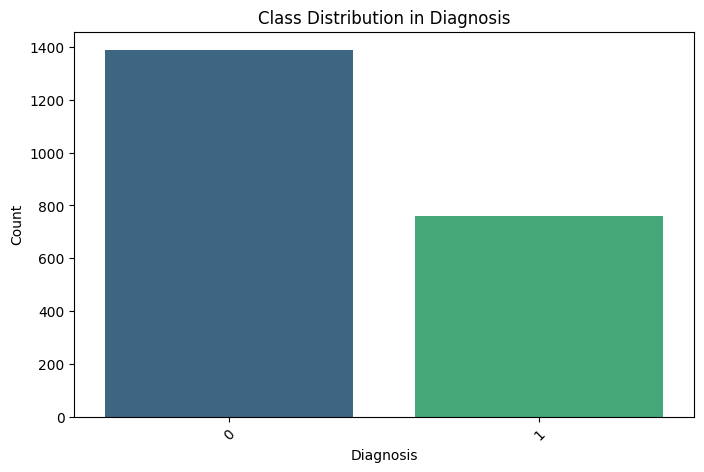

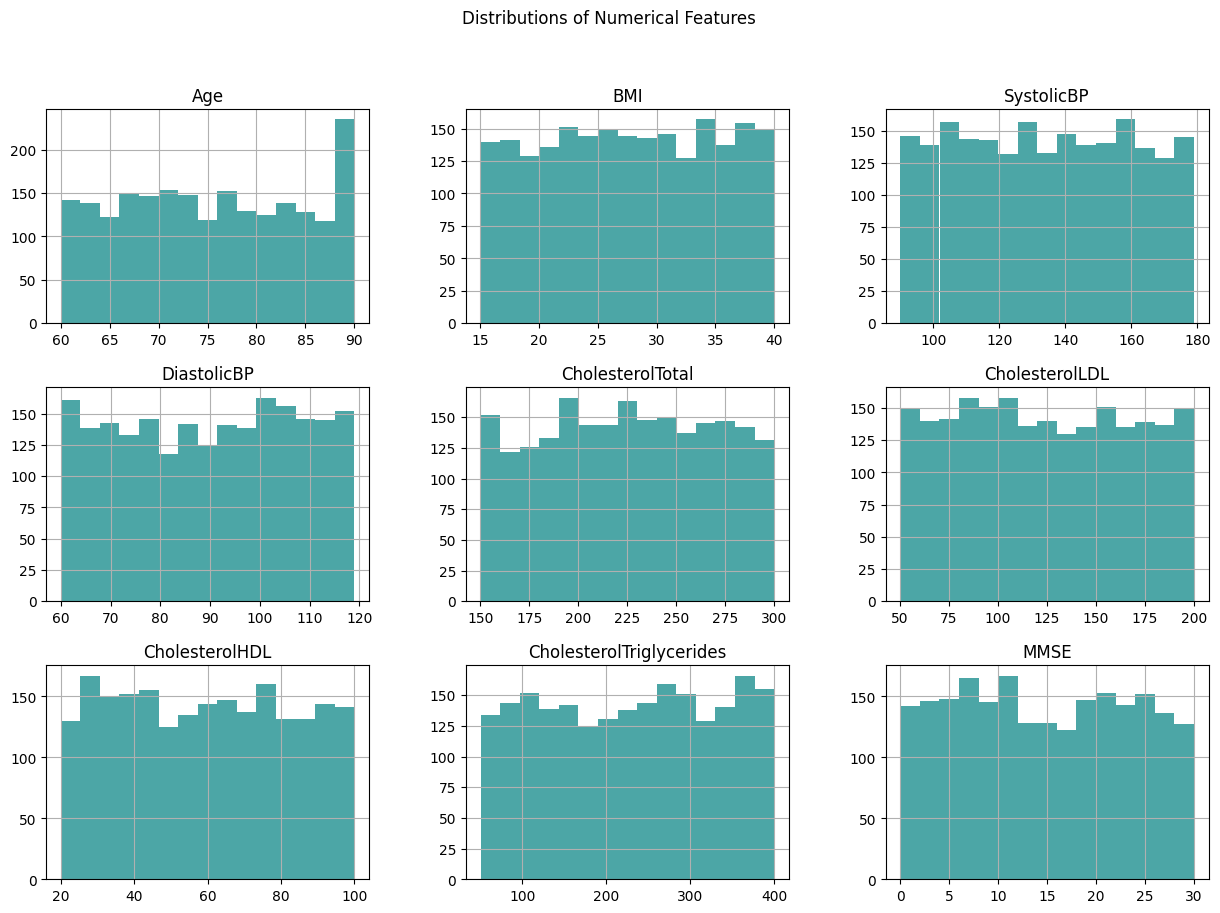

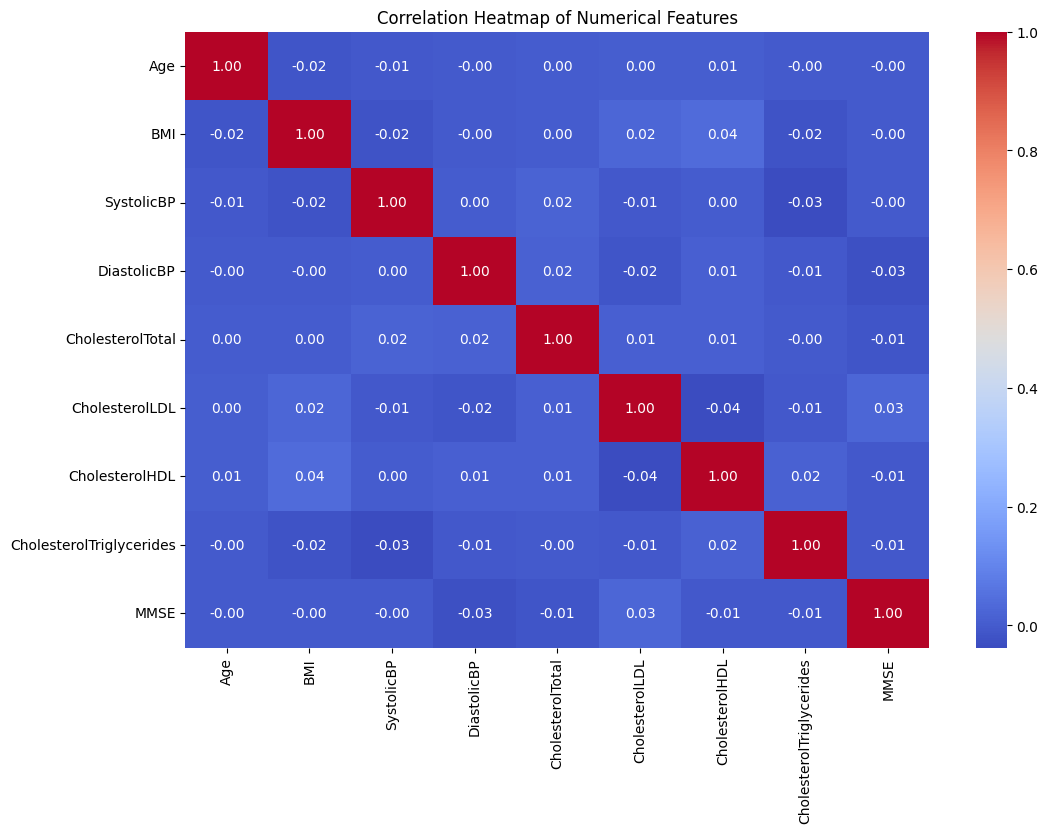

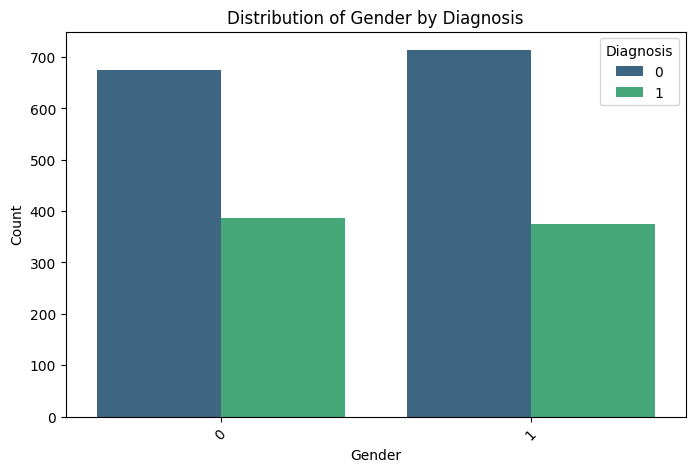

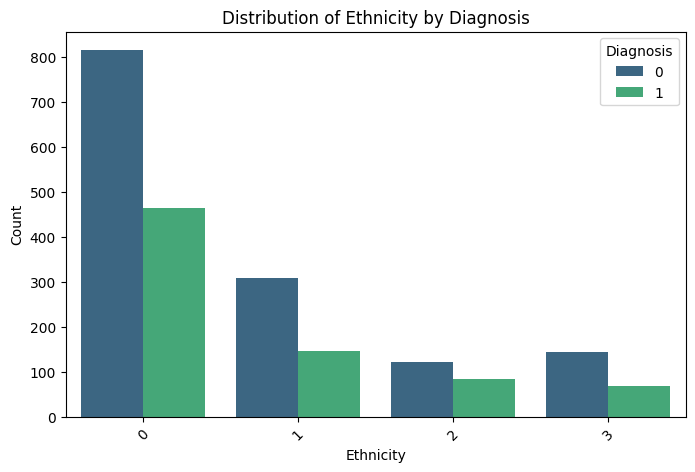

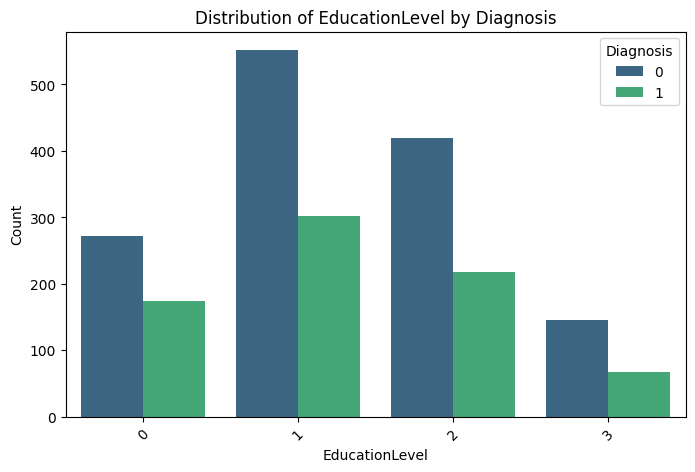

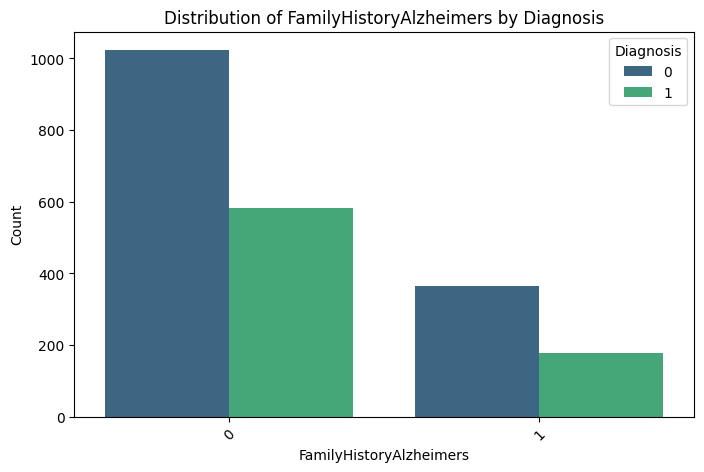

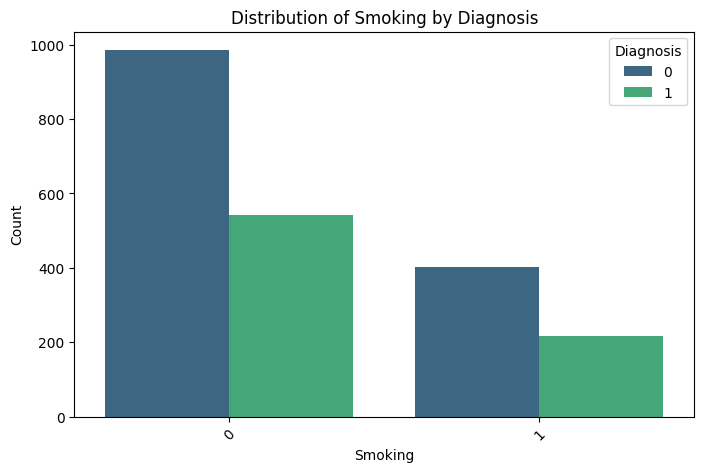

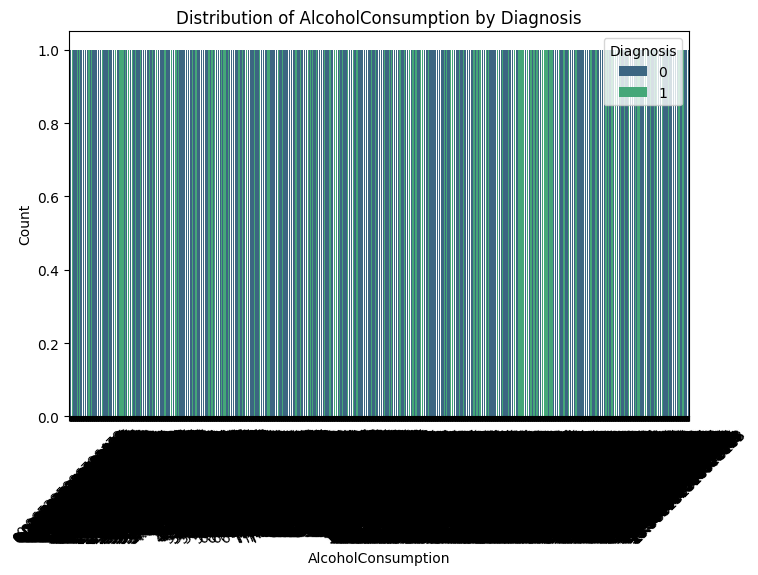

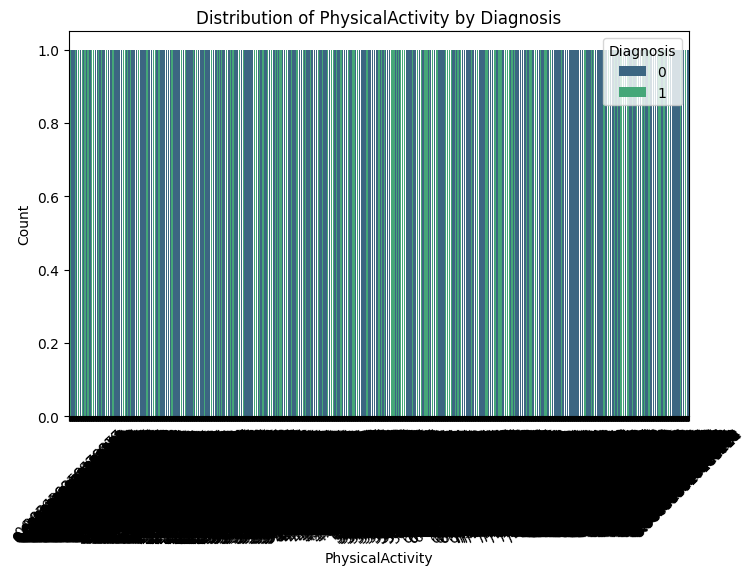

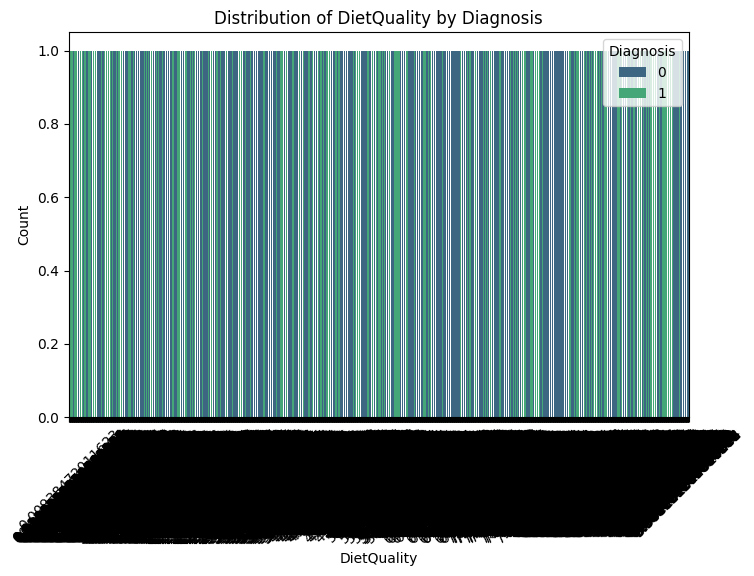

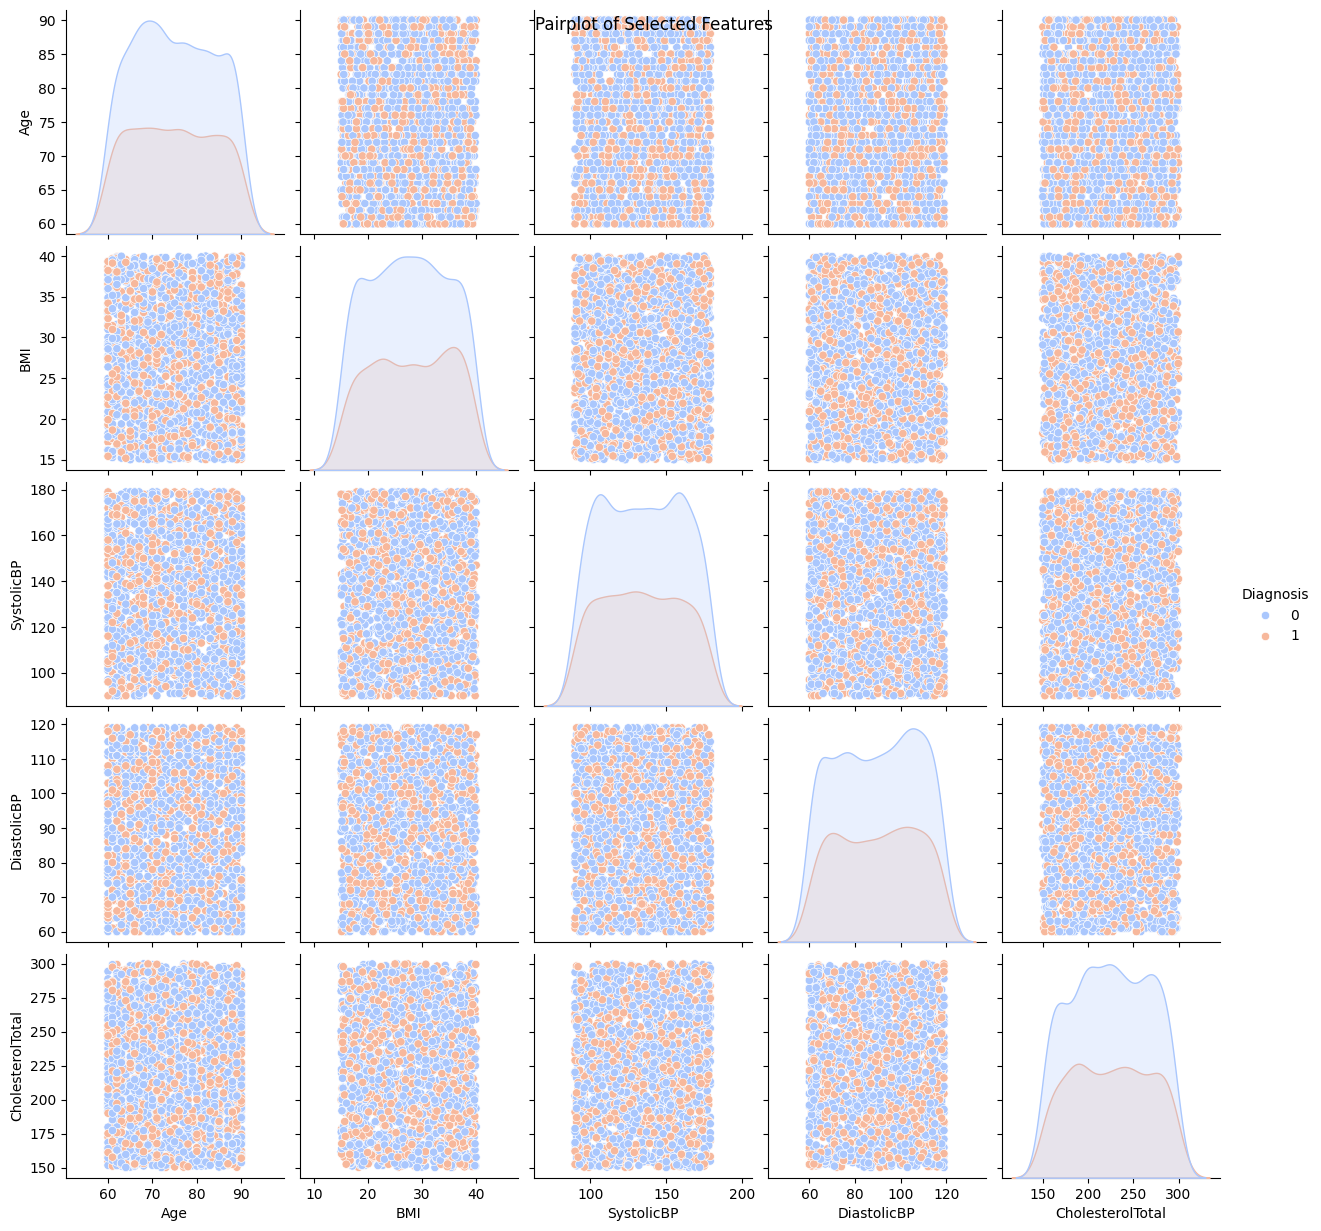

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataset(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display dataset overview
    print("Dataset Overview:")
    print(df.info())
    print("\nFirst 5 Rows of Data:")
    print(df.head())

    # Visualize class distribution in the target variable
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Diagnosis', data=df, palette='viridis')
    plt.title('Class Distribution in Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Visualize distributions of numerical features
    num_features = [
        'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
        'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE'
    ]
    df[num_features].hist(bins=15, figsize=(15, 10), color='teal', alpha=0.7)
    plt.suptitle('Distributions of Numerical Features')
    plt.show()

    # Correlation heatmap for numerical features
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[num_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

    # Compare selected features against the target variable
    categorical_features = [
        'Gender', 'Ethnicity', 'EducationLevel', 'FamilyHistoryAlzheimers',
        'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality'
    ]
    for feature in categorical_features:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=feature, hue='Diagnosis', data=df, palette='viridis')
        plt.title(f'Distribution of {feature} by Diagnosis')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Diagnosis', loc='upper right')
        plt.show()

    # Pairplot for selected features and target
    selected_features = num_features[:5] + ['Diagnosis']
    sns.pairplot(df[selected_features], hue='Diagnosis', palette='coolwarm')
    plt.suptitle('Pairplot of Selected Features')
    plt.show()

# Path to your dataset
dataset_path = '/content/alzheimers_disease_data.csv'  # Replace with your dataset file path

# Visualize dataset
visualize_dataset(dataset_path)


Total number of training samples: 1719
Total number of testing samples: 430


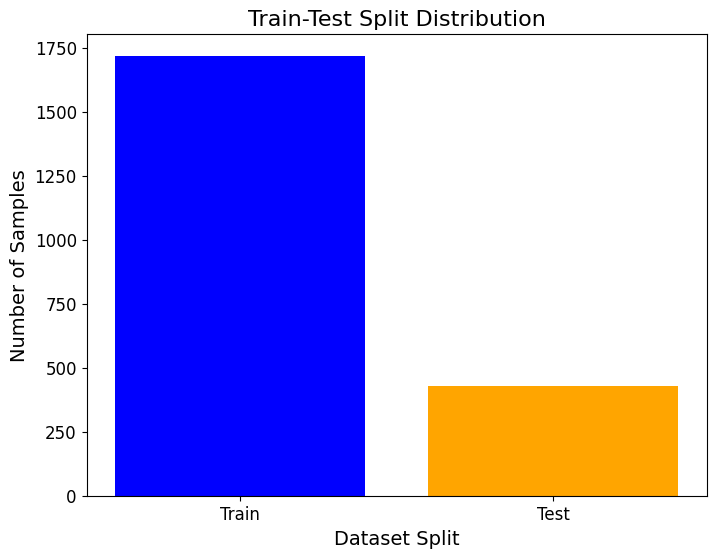

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def load_data_and_plot(file_path):
    # Load dataset
    df = pd.read_csv(file_path)

    # Define the feature columns and target column
    feature_columns = [
        'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
        'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
        'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression',
        'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
        'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
        'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
        'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
        'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
    ]
    target_column = 'Diagnosis'

    # Prepare features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate the number of samples
    train_size = len(X_train)
    test_size = len(X_test)

    # Print the train and test dataset sizes
    print(f"Total number of training samples: {train_size}")
    print(f"Total number of testing samples: {test_size}")

    # Plotting train and test distribution
    plt.figure(figsize=(8, 6))
    plt.bar(['Train', 'Test'], [train_size, test_size], color=['blue', 'orange'])
    plt.xlabel('Dataset Split', fontsize=14)
    plt.ylabel('Number of Samples', fontsize=14)
    plt.title('Train-Test Split Distribution', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Path to your dataset
dataset_path = '/content/alzheimers_disease_data.csv'  # Replace with your actual dataset file path

# Load data and plot train-test split
load_data_and_plot(dataset_path)
